[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bobleesj/quantem.widget/blob/main/notebooks/show2d/show2d_simple.ipynb)

# Show2D — Quick Demo

Single images and gallery layouts with different column configurations.

In [1]:
%load_ext autoreload
%autoreload 2
%env ANYWIDGET_HMR=1

env: ANYWIDGET_HMR=1


In [2]:
import numpy as np
from quantem.widget import Show2D

def make_hrtem(size=256, seed=0):
    """Simulate HRTEM lattice fringes with amorphous edge and shot noise."""
    rng = np.random.default_rng(seed)
    y, x = np.mgrid[:size, :size]
    img = np.zeros((size, size))
    freqs = [(0.08, 0.0), (0.06, np.pi / 3), (0.10, np.pi / 6)]
    for freq, angle in freqs:
        img += np.cos(2 * np.pi * freq * (x * np.cos(angle) + y * np.sin(angle)))
    r = np.sqrt((x - size // 2)**2 + (y - size // 2)**2)
    envelope = 1.0 / (1 + np.exp(-0.05 * (size // 3 - r)))
    img = img * envelope + rng.normal(0, 0.3, (size, size))
    return img.astype(np.float32)

# Generate a few different images
imgs = [make_hrtem(256, seed=i) for i in range(6)]

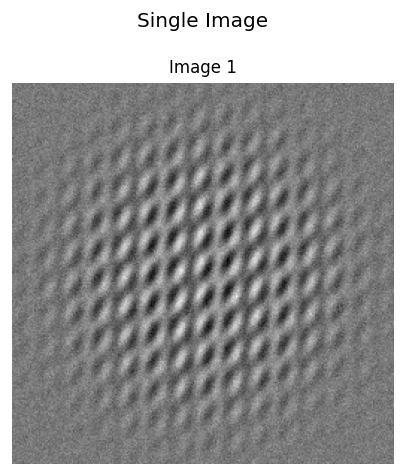

In [3]:
# Single image
Show2D(imgs[0], title="Single Image", cmap="gray")

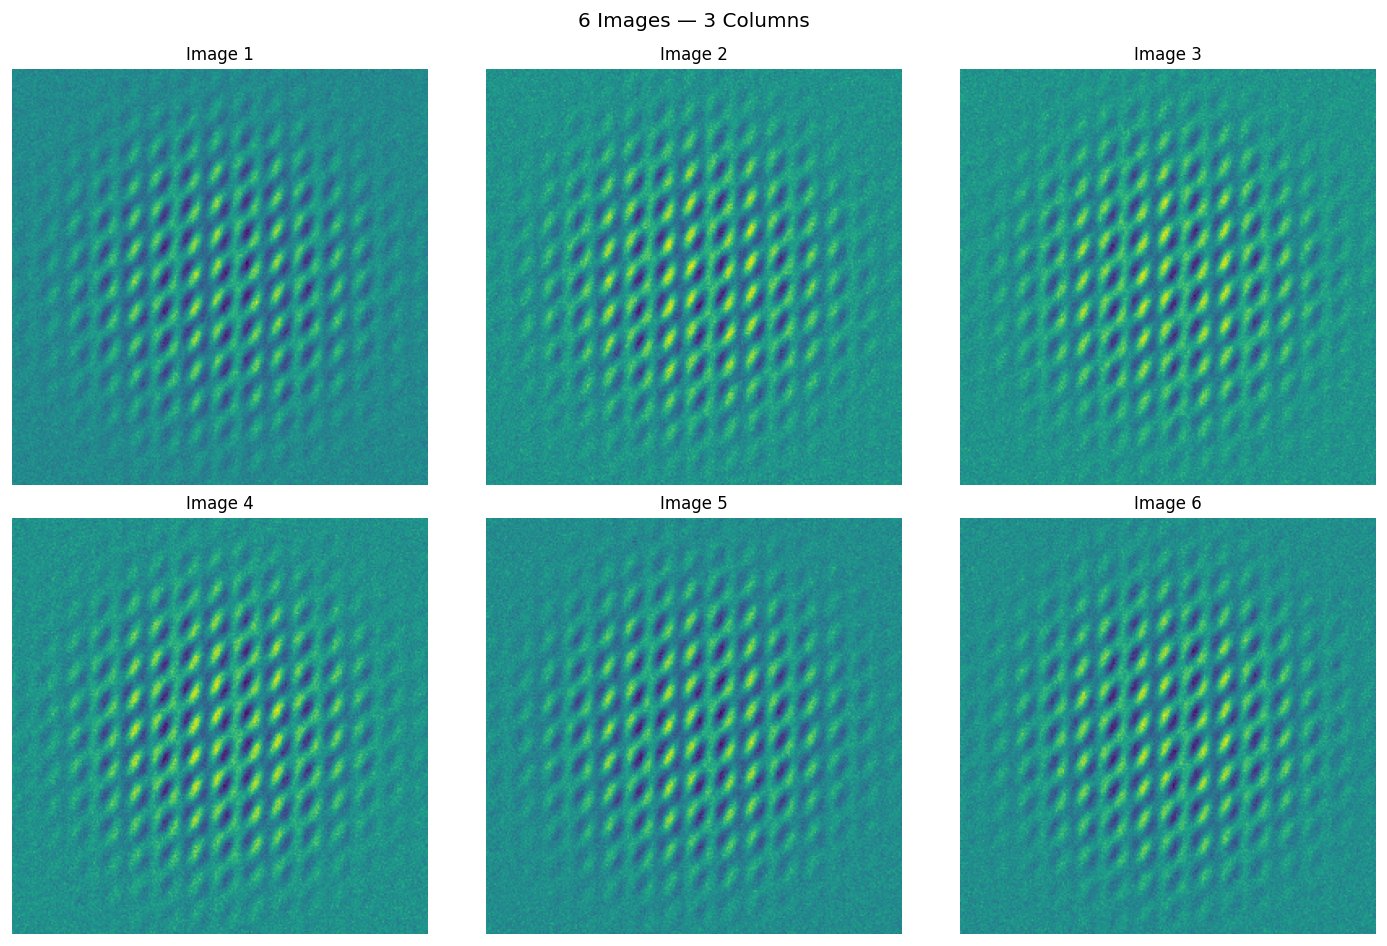

In [4]:
# 6 images, 3 columns
Show2D(imgs, title="6 Images — 3 Columns", ncols=3, cmap="viridis")

## Inspect Widget State

In [5]:
w = Show2D(imgs[0], title="Single Image", cmap="gray")
w.summary()

Single Image
════════════════════════════════
Image:    256×256
Data:     min=-3.437  max=3.831  mean=0.0009885
Display:  gray | manual contrast | linear
